In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [50]:
df = pd.read_csv("Titanic-Dataset.csv")
df["Sex"] = df["Sex"].map({"male":1 , "female":2})
df["Embarked"] = df["Embarked"].map({"S":1, "C":2, "Q":3})
df["Cabin"] = df["Cabin"].fillna("0")
df["Cabin"] = df["Cabin"].apply(lambda x: 0 if x == "0" else len(x.split()))
df.drop(columns = ["PassengerId" , "Name" , "Ticket"], inplace = True)


In [51]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,0,1.0
1,1,1,2,38.0,1,0,71.2833,1,2.0
2,1,3,2,26.0,0,0,7.9250,0,1.0
3,1,1,2,35.0,1,0,53.1000,1,1.0
4,0,3,1,35.0,0,0,8.0500,0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1.0
887,1,1,2,19.0,0,0,30.0000,1,1.0
888,0,3,2,NaN,1,2,23.4500,0,1.0
889,1,1,1,26.0,0,0,30.0000,1,2.0


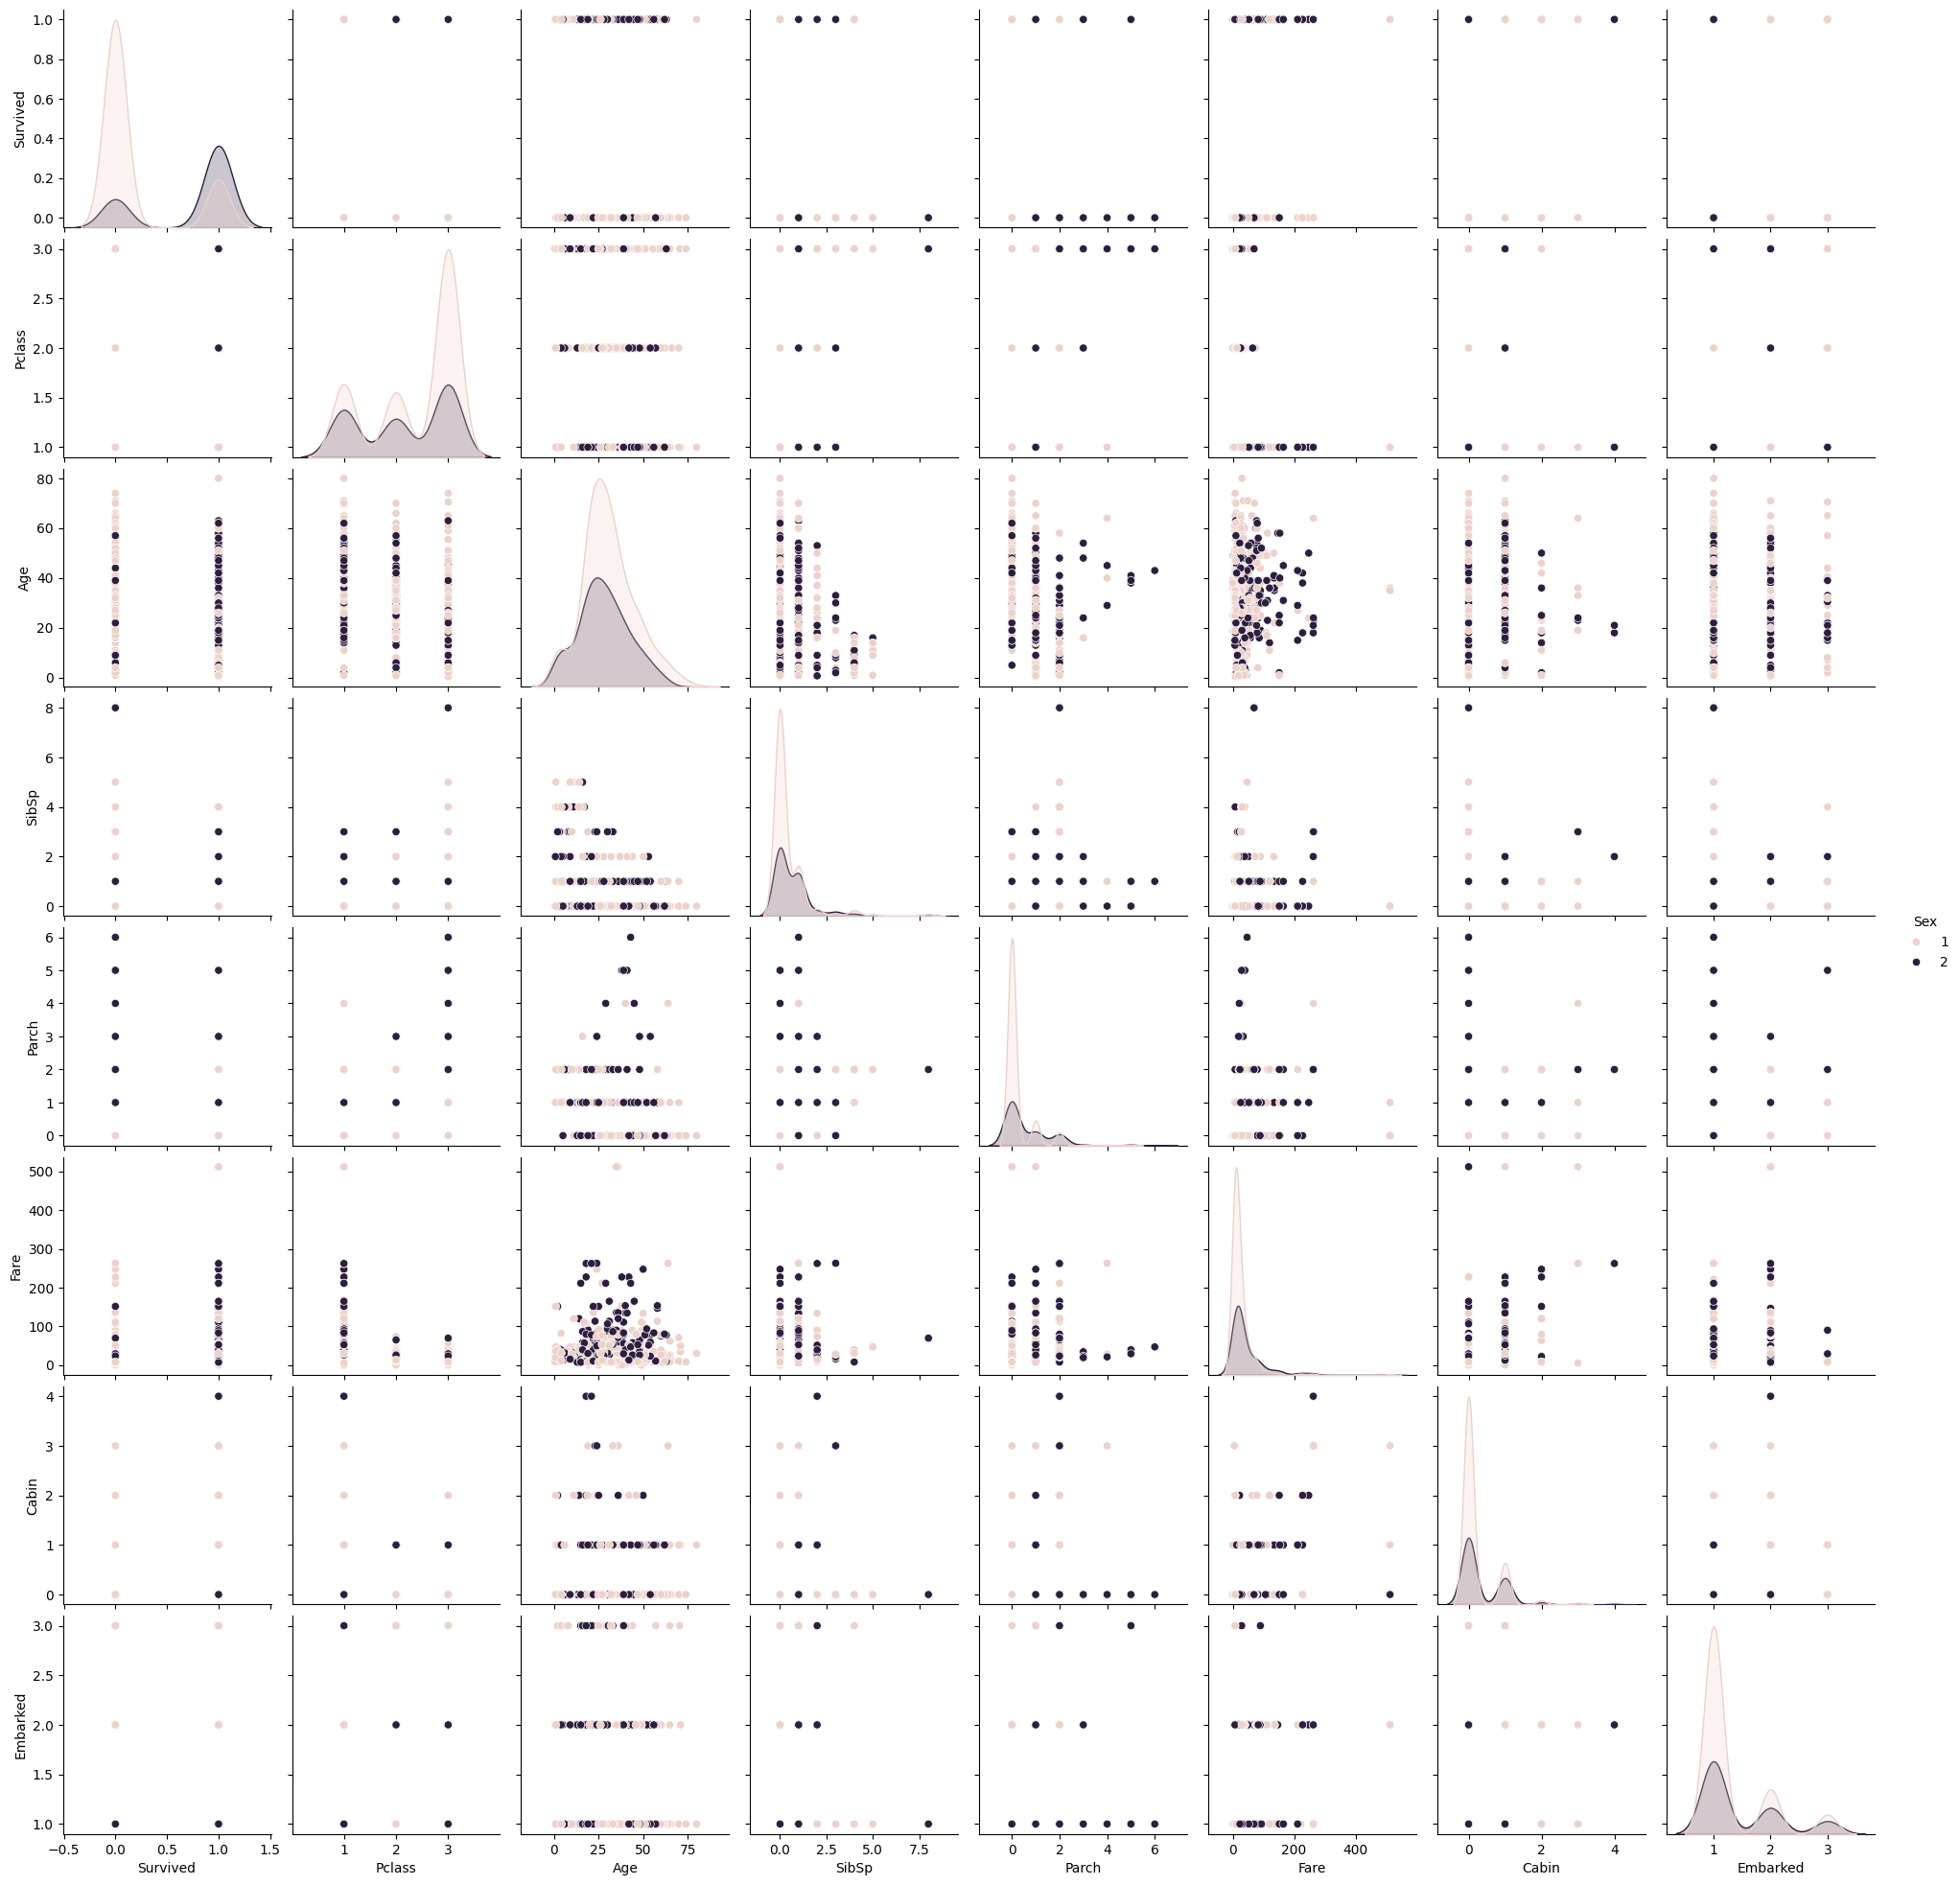

In [52]:
sns.pairplot(df , hue = "Sex")

In [53]:
corr_matrix = df.corr(method="pearson")
print(corr_matrix)


          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.077221 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.369226  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.093254  0.114631  0.245489   
Age      -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119   
SibSp    -0.035322  0.083081  0.114631 -0.308247  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.189119  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.096067  0.159651  0.216225   
Cabin     0.277053 -0.647116  0.129430  0.172708  0.012150  0.127846   
Embarked  0.108669  0.043835  0.118593  0.012186 -0.060606 -0.079320   

              Fare     Cabin  Embarked  
Survived  0.257307  0.277053  0.108669  
Pclass   -0.549500 -0.647116  0.043835  
Sex       0.182333  0.129430  0.118593  
Age       0.096067  0.172708  0.012186  
SibSp     0.159651  0.012150 -0.060606  
Parch     0.216225  0.127846 -0.0

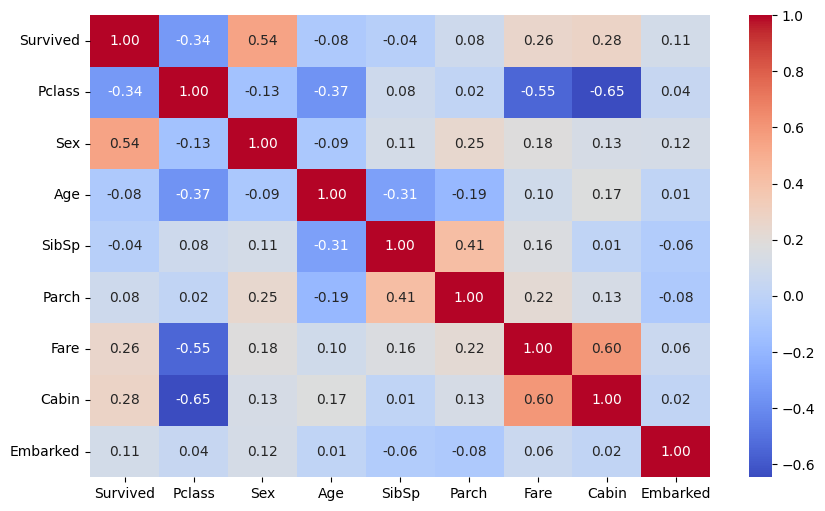

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [55]:
corr, p_value = pearsonr(df["Cabin"], df["Fare"])
print("ضریب همبستگی:", corr)
print("مقدار p:", p_value)

ضریب همبستگی: 0.5961712070941085
مقدار p: 7.492613507516367e-87


<Axes: xlabel='Cabin', ylabel='Survived'>

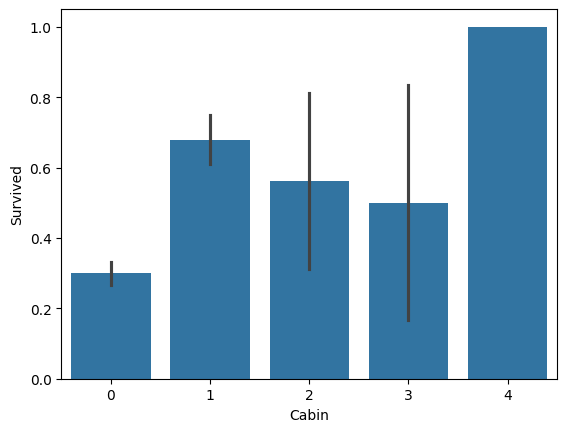

In [56]:
sns.barplot(x="Cabin", y="Survived", data=df)

<Axes: xlabel='Family', ylabel='Survived'>

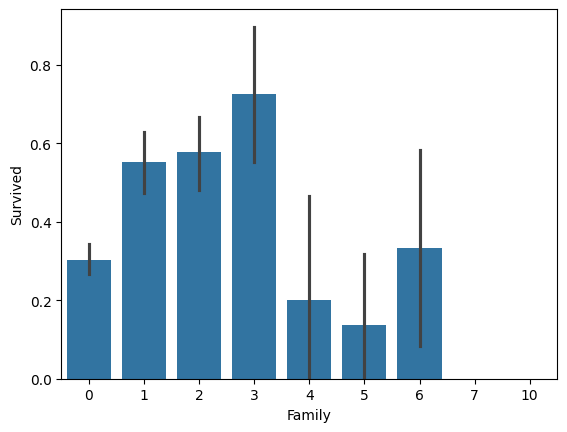

In [57]:
df["Family"] = df["SibSp"] + df["Parch"]

sns.barplot(x="Family", y="Survived", data=df)

<Axes: xlabel='Embarked', ylabel='Survived'>

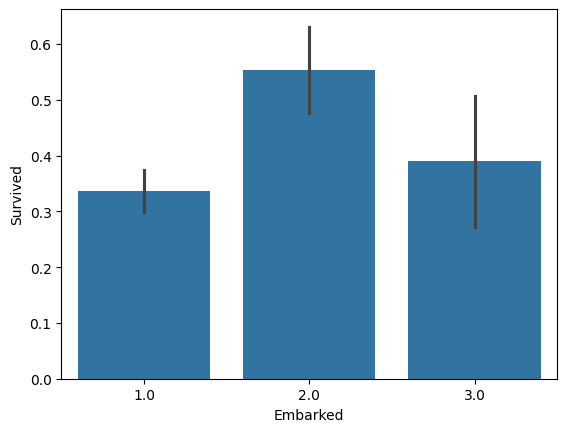

In [58]:
sns.barplot(x="Embarked", y="Survived", data=df)


<Axes: xlabel='Sex', ylabel='Survived'>

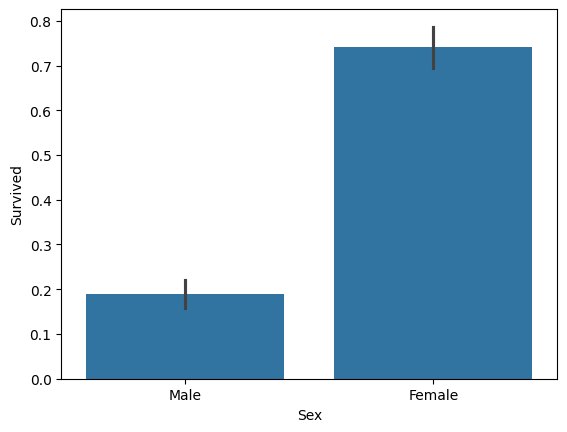

In [59]:
sns.barplot(x=df["Sex"].map({1:"Male", 2:"Female"}), y=df["Survived"])

<Axes: xlabel='Age', ylabel='Count'>

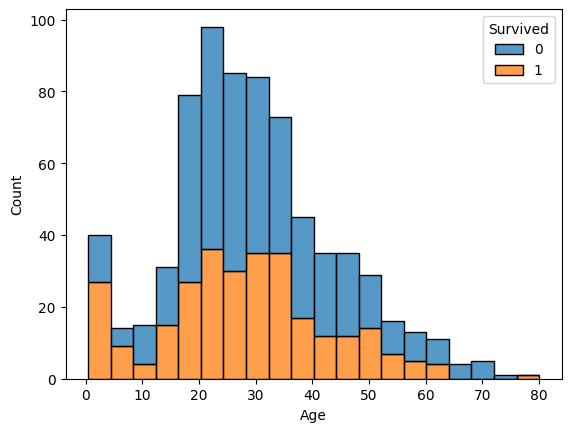

In [60]:
sns.histplot(data=df.dropna(subset=["Age"]), x="Age", hue="Survived", bins=20, kde=False, multiple="stack")


<Axes: xlabel='Pclass', ylabel='Survived'>

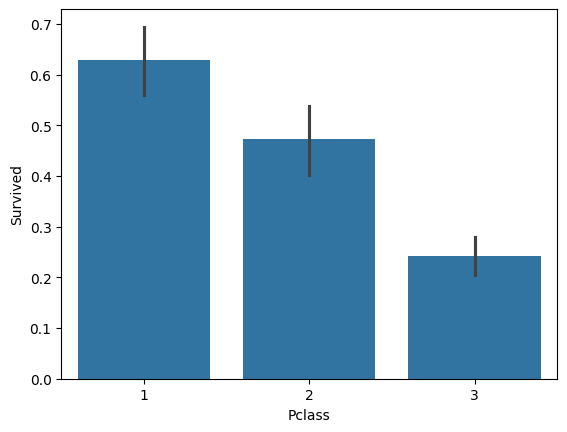

In [61]:
sns.barplot(x="Pclass", y="Survived", data=df)